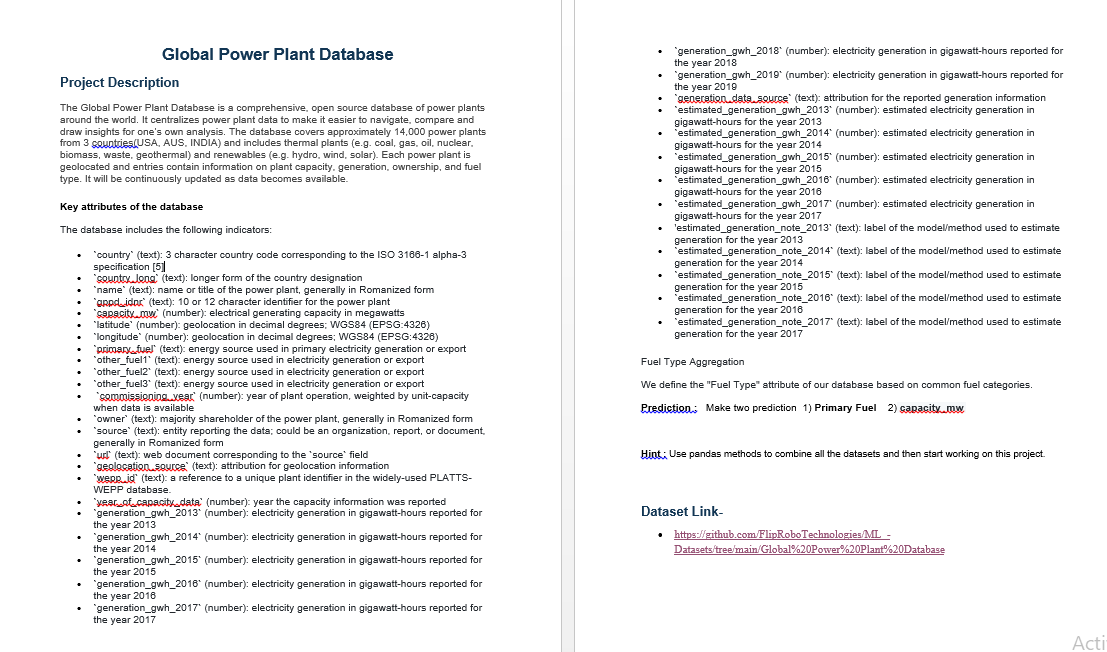

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/tree/main/Global%20Power%20Plant%20Database


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [81]:
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv'
data1 = pd.read_csv(url)
data1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,AUS,Australia,Yuendumu,AUS0000465,0.24,-22.2426,131.7931,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
510,AUS,Australia,Yulara,AUS0000257,10.95,-25.2323,130.9912,Gas,NaN,NaN,...,2019.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN


In [82]:
data2 = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')
data2

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
data3 = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv')
data3

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.46700,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671,2.46015,2.489,1.670,1.23349,2.630,1.21100,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161,1.58900,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000,0.00000,0.000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [84]:
# Concatenation
df = pd.concat([data1, data2, data3])

df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [85]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,estimated_generation_gwh
count,13292.000000,13220.000000,13220.000000,10654.000000,0.0,12860.0,7170.000000,7534.000000,7993.000000,8701.000000,9292.000000,9858.000000,0.0
mean,117.738717,35.053213,-73.794217,1998.184904,NaN,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,NaN
std,347.169038,15.444195,62.868834,24.017781,NaN,0.0,2030.523760,2193.172655,2148.167470,2050.411295,2001.411908,1963.485305,NaN
min,0.000000,-42.888300,-171.712400,1896.000000,NaN,2019.0,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,NaN
25%,1.500000,33.901700,-104.659875,1988.000000,NaN,2019.0,1.653075,2.018000,2.140000,2.108000,2.063750,2.141250,NaN
50%,5.500000,38.389750,-87.346000,2008.000000,NaN,2019.0,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,NaN
75%,52.725000,42.175125,-75.475925,2015.000000,NaN,2019.0,185.326498,217.069500,200.279000,173.348004,157.889688,149.141249,NaN
max,6809.000000,425.246100,153.434100,2020.000000,NaN,2019.0,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url        

In [ ]:
#EDA

In [88]:
from sklearn.preprocessing import LabelEncoder

# Drop columns with all NaN values
df = df.dropna(axis=1, how='all')

# Fill missing values
df['capacity_mw'] = df['capacity_mw'].fillna(df['capacity_mw'].median())
df['latitude'] = df['latitude'].fillna(df['latitude'].median())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].median())
df['primary_fuel'] = df['primary_fuel'].fillna(df['primary_fuel'].mode()[0])

# Encode categorical variables
label_encoder = LabelEncoder()
df['primary_fuel'] = label_encoder.fit_transform(df['primary_fuel'])
df['country'] = label_encoder.fit_transform(df['country'])
df['country_long'] = label_encoder.fit_transform(df['country_long'])
df['name'] = label_encoder.fit_transform(df['name'])
df['gppd_idnr'] = label_encoder.fit_transform(df['gppd_idnr'])
df['owner'] = df['owner'].fillna('Unknown')
df['owner'] = label_encoder.fit_transform(df['owner'])
df['source'] = label_encoder.fit_transform(df['source'])
df['url'] = label_encoder.fit_transform(df['url'])
df['geolocation_source'] = label_encoder.fit_transform(df['geolocation_source'])
df['generation_data_source'] = df['generation_data_source'].fillna('Unknown')
df['generation_data_source'] = label_encoder.fit_transform(df['generation_data_source'])

# Drop the columns that are not required
columns_to_drop = [
    'other_fuel1', 'other_fuel2', 'other_fuel3', 'wepp_id', 
    'estimated_generation_gwh', 'generation_gwh_2013', 
    'generation_gwh_2014', 'generation_gwh_2015', 
    'generation_gwh_2016', 'generation_gwh_2017', 
    'generation_gwh_2018', 'generation_gwh_2019'
]

# Only drop columns that exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(existing_columns_to_drop, axis=1)

# Display the cleaned dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  int64  
 1   country_long            13298 non-null  int64  
 2   name                    13298 non-null  int64  
 3   gppd_idnr               13298 non-null  int64  
 4   capacity_mw             13298 non-null  float64
 5   latitude                13298 non-null  float64
 6   longitude               13298 non-null  float64
 7   primary_fuel            13298 non-null  int64  
 8   commissioning_year      13298 non-null  float64
 9   owner                   13298 non-null  int64  
 10  source                  13298 non-null  int64  
 11  url                     13298 non-null  int64  
 12  geolocation_source      13298 non-null  int64  
 13  year_of_capacity_data   12860 non-null  float64
 14  generation_data_source  13298 non-null  int

In [92]:
# Fill missing values in year_of_capacity_data with the median
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].median(), inplace=True)


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  int64  
 1   country_long            13298 non-null  int64  
 2   name                    13298 non-null  int64  
 3   gppd_idnr               13298 non-null  int64  
 4   capacity_mw             13298 non-null  float64
 5   latitude                13298 non-null  float64
 6   longitude               13298 non-null  float64
 7   primary_fuel            13298 non-null  int64  
 8   commissioning_year      13298 non-null  float64
 9   owner                   13298 non-null  int64  
 10  source                  13298 non-null  int64  
 11  url                     13298 non-null  int64  
 12  geolocation_source      13298 non-null  int64  
 13  year_of_capacity_data   13298 non-null  float64
 14  generation_data_source  13298 non-null  int

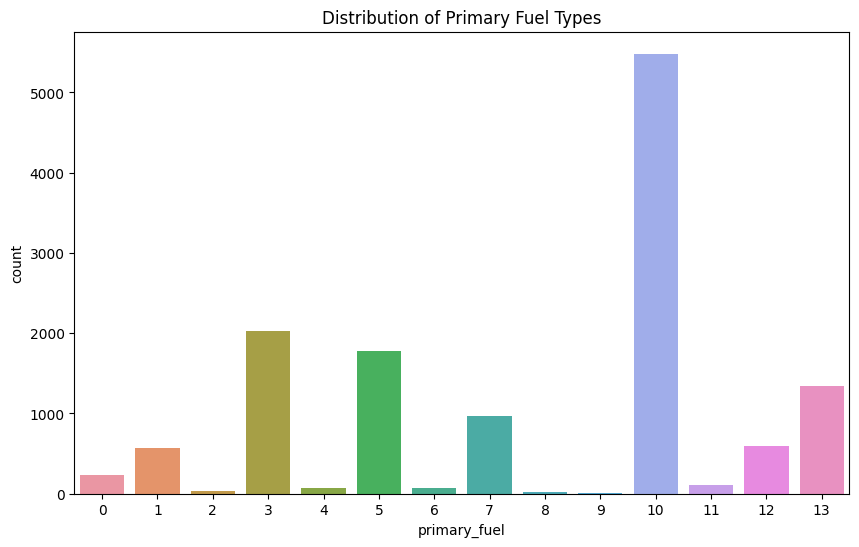

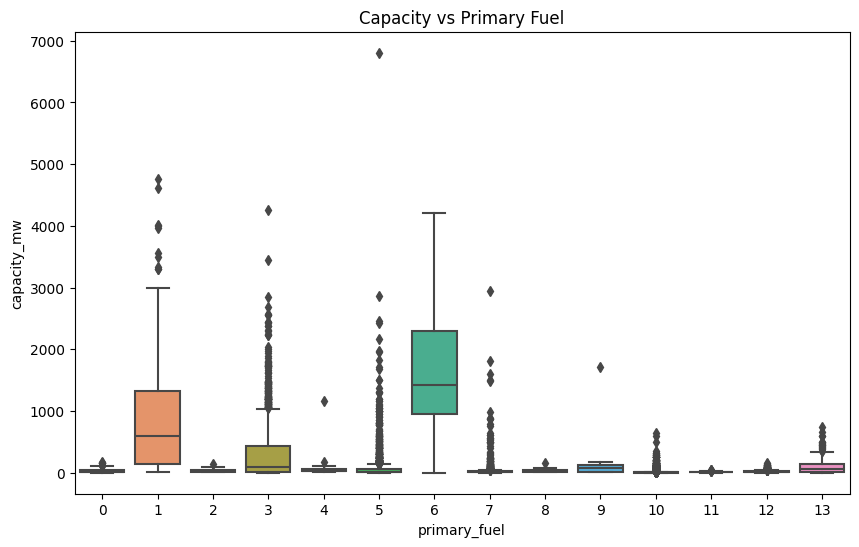

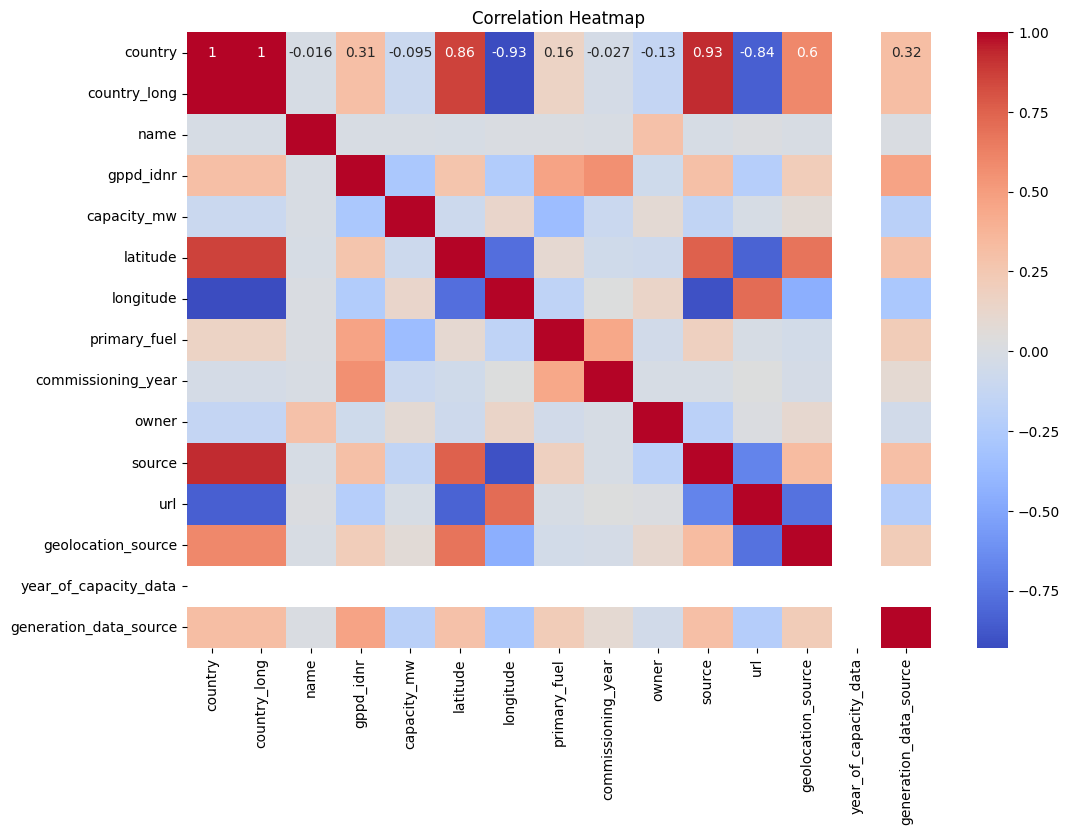

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of primary fuel types
plt.figure(figsize=(10, 6))
sns.countplot(x='primary_fuel', data=df)
plt.title('Distribution of Primary Fuel Types')
plt.show()

# Visualize the relationship between capacity and primary fuel
plt.figure(figsize=(10, 6))
sns.boxplot(x='primary_fuel', y='capacity_mw', data=df)
plt.title('Capacity vs Primary Fuel')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


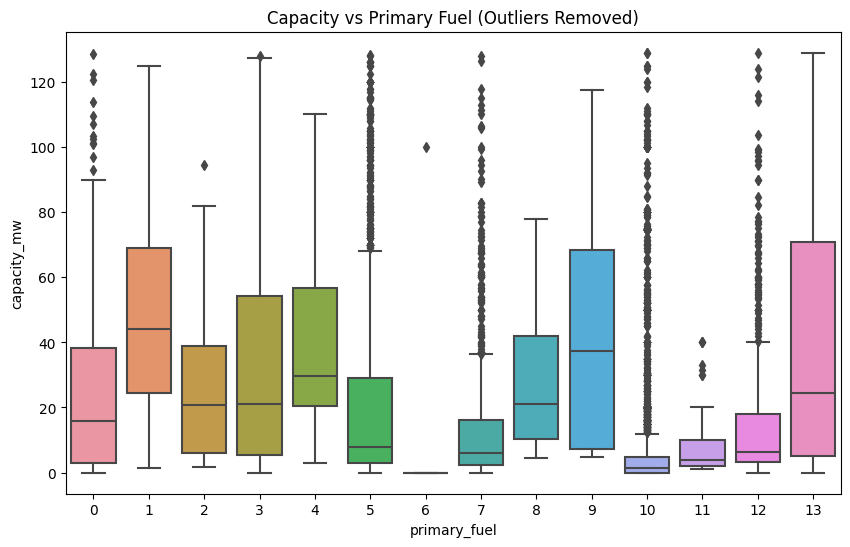

In [96]:
# Detect outliers using the IQR method for capacity_mw
Q1 = df['capacity_mw'].quantile(0.25)
Q3 = df['capacity_mw'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only the data points within the IQR range for capacity_mw
df = df[(df['capacity_mw'] >= lower_bound) & (df['capacity_mw'] <= upper_bound)]

# Visualize the distribution after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='primary_fuel', y='capacity_mw', data=df)
plt.title('Capacity vs Primary Fuel (Outliers Removed)')
plt.show()


In [97]:
from sklearn.preprocessing import StandardScaler

# Features and target variables
X = df.drop(['primary_fuel', 'capacity_mw'], axis=1)
y_fuel = df['primary_fuel']
y_capacity = df['capacity_mw']


In [98]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Test & train

In [99]:
from sklearn.model_selection import train_test_split

# Split the data
X_train_fuel, X_test_fuel, y_train_fuel, y_test_fuel = train_test_split(X_scaled, y_fuel, test_size=0.2, random_state=42)
X_train_capacity, X_test_capacity, y_train_capacity, y_test_capacity = train_test_split(X_scaled, y_capacity, test_size=0.2, random_state=42)


In [ ]:
#Model Building

In [100]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

# Initialize the models
clf = RandomForestClassifier(random_state=42)
reg = RandomForestRegressor(random_state=42)

# Train the models
clf.fit(X_train_fuel, y_train_fuel)
reg.fit(X_train_capacity, y_train_capacity)

# Predict and evaluate for primary_fuel
y_pred_fuel = clf.predict(X_test_fuel)
fuel_accuracy = accuracy_score(y_test_fuel, y_pred_fuel)
print("Fuel Type Prediction Accuracy: ", fuel_accuracy)

# Predict and evaluate for capacity_mw
y_pred_capacity = reg.predict(X_test_capacity)
capacity_mae = mean_absolute_error(y_test_capacity, y_pred_capacity)
print("Capacity MW Prediction MAE: ", capacity_mae)


Fuel Type Prediction Accuracy:  0.8144836835046938
Capacity MW Prediction MAE:  12.513090424675905


In [ ]:
#Overfitting/Underfitting

In [101]:
# Evaluate on training data for primary_fuel
y_train_pred_fuel = clf.predict(X_train_fuel)
train_fuel_accuracy = accuracy_score(y_train_fuel, y_train_pred_fuel)
print("Training Fuel Type Prediction Accuracy: ", train_fuel_accuracy)

# Evaluate on training data for capacity_mw
y_train_pred_capacity = reg.predict(X_train_capacity)
train_capacity_mae = mean_absolute_error(y_train_capacity, y_train_pred_capacity)
print("Training Capacity MW Prediction MAE: ", train_capacity_mae)


Training Fuel Type Prediction Accuracy:  1.0
Training Capacity MW Prediction MAE:  4.536130371198569


In [ ]:
#Saving the Models

In [102]:
import joblib

# Save the models
joblib.dump(clf, 'random_forest_classifier.pkl')
joblib.dump(reg, 'random_forest_regressor.pkl')


['random_forest_regressor.pkl']

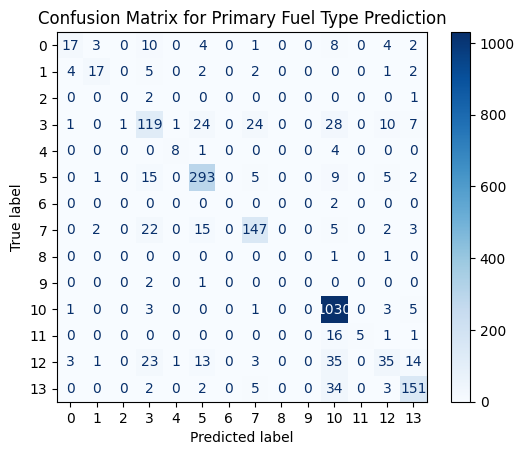

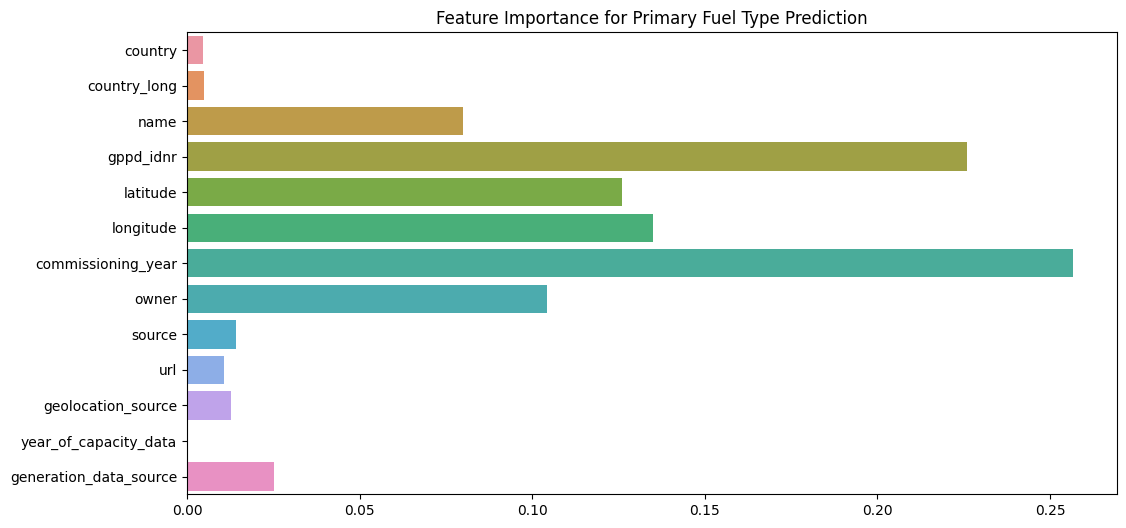

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import mean_squared_error, r2_score

# Classification: Confusion Matrix
y_pred_fuel = clf.predict(X_test_fuel)
cm = confusion_matrix(y_test_fuel, y_pred_fuel, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Primary Fuel Type Prediction')
plt.show()

# Classification: Feature Importance
feature_importances_clf = clf.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_clf, y=features)
plt.title('Feature Importance for Primary Fuel Type Prediction')
plt.show()







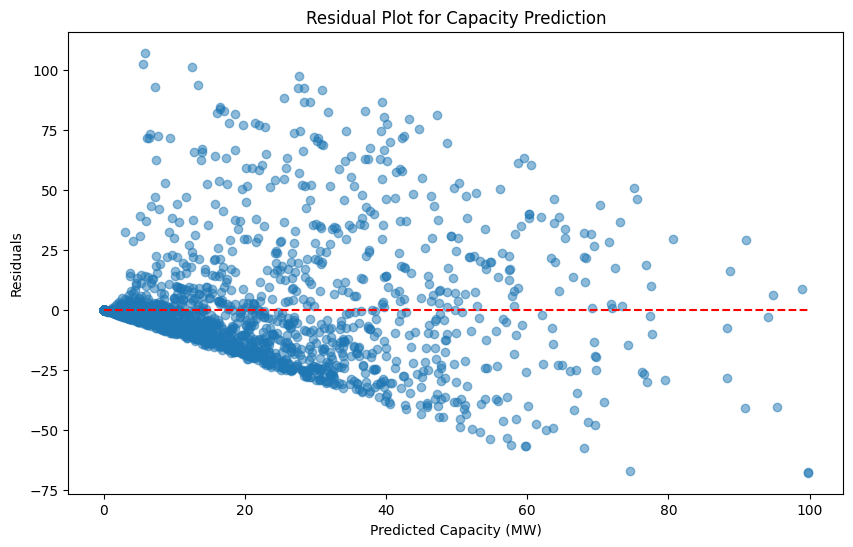

In [104]:
# Regression: Residual Plot
residuals = y_test_capacity - y_pred_capacity

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_capacity, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_capacity.min(), xmax=y_pred_capacity.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted Capacity (MW)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Capacity Prediction')
plt.show()

In [105]:
# Regression: Metrics
mse = mean_squared_error(y_test_capacity, y_pred_capacity)
r2 = r2_score(y_test_capacity, y_pred_capacity)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 443.68484721866577
R^2 Score: 0.3979555185522452


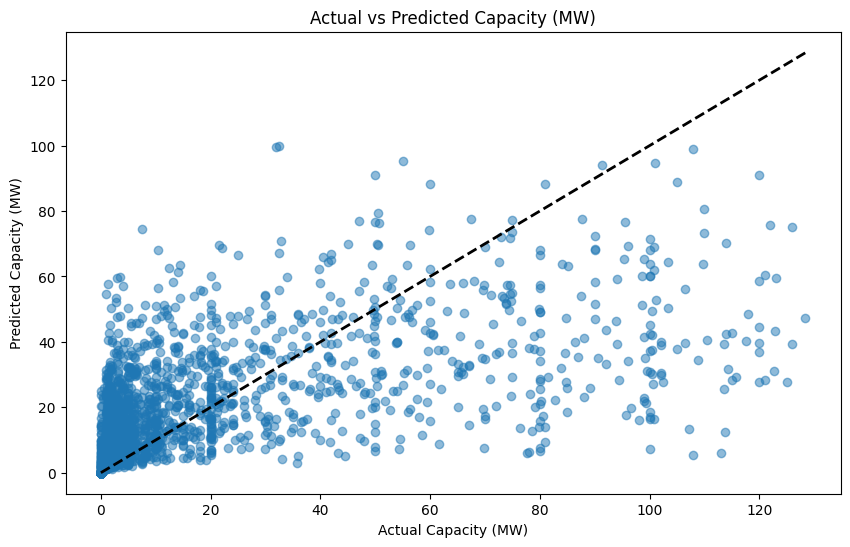

In [107]:
# Regression: Actual vs Predicted
y_pred_capacity = reg.predict(X_test_capacity)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_capacity, y_pred_capacity, alpha=0.5)
plt.plot([y_test_capacity.min(), y_test_capacity.max()], [y_test_capacity.min(), y_test_capacity.max()], 'k--', lw=2)
plt.xlabel('Actual Capacity (MW)')
plt.ylabel('Predicted Capacity (MW)')
plt.title('Actual vs Predicted Capacity (MW)')
plt.show()